In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

### Loading the Dataset

In [3]:
dataset_path = 'D:\Babin\Internship\Data Science\Datasets\\netflix_titles.csv'
netflix = pd.read_csv(dataset_path)
netflix.head(n=2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Using .info() method to find out the columns, types and the non_null values in the dataset

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Here, we can see that there are 8807 total records in the dataframe, and that the columns <b>'director', 'cast', 'country', 'date_added', 'rating', and 'duration' </b> have some null values.

### Checking the null values counts

In [5]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix.isnull().sum()/len(netflix)

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

The above statistics represents that the total number of null values found in each of the columns. Here, we can see that about 30% of the data in the director's column is a null value, and about 9% of the data for cast and country are null values. And about less than 1% of the data in the date_added, rating, and the duration column are null values.

## Visualizing the null values

In [7]:
import missingno as msno

<AxesSubplot:>

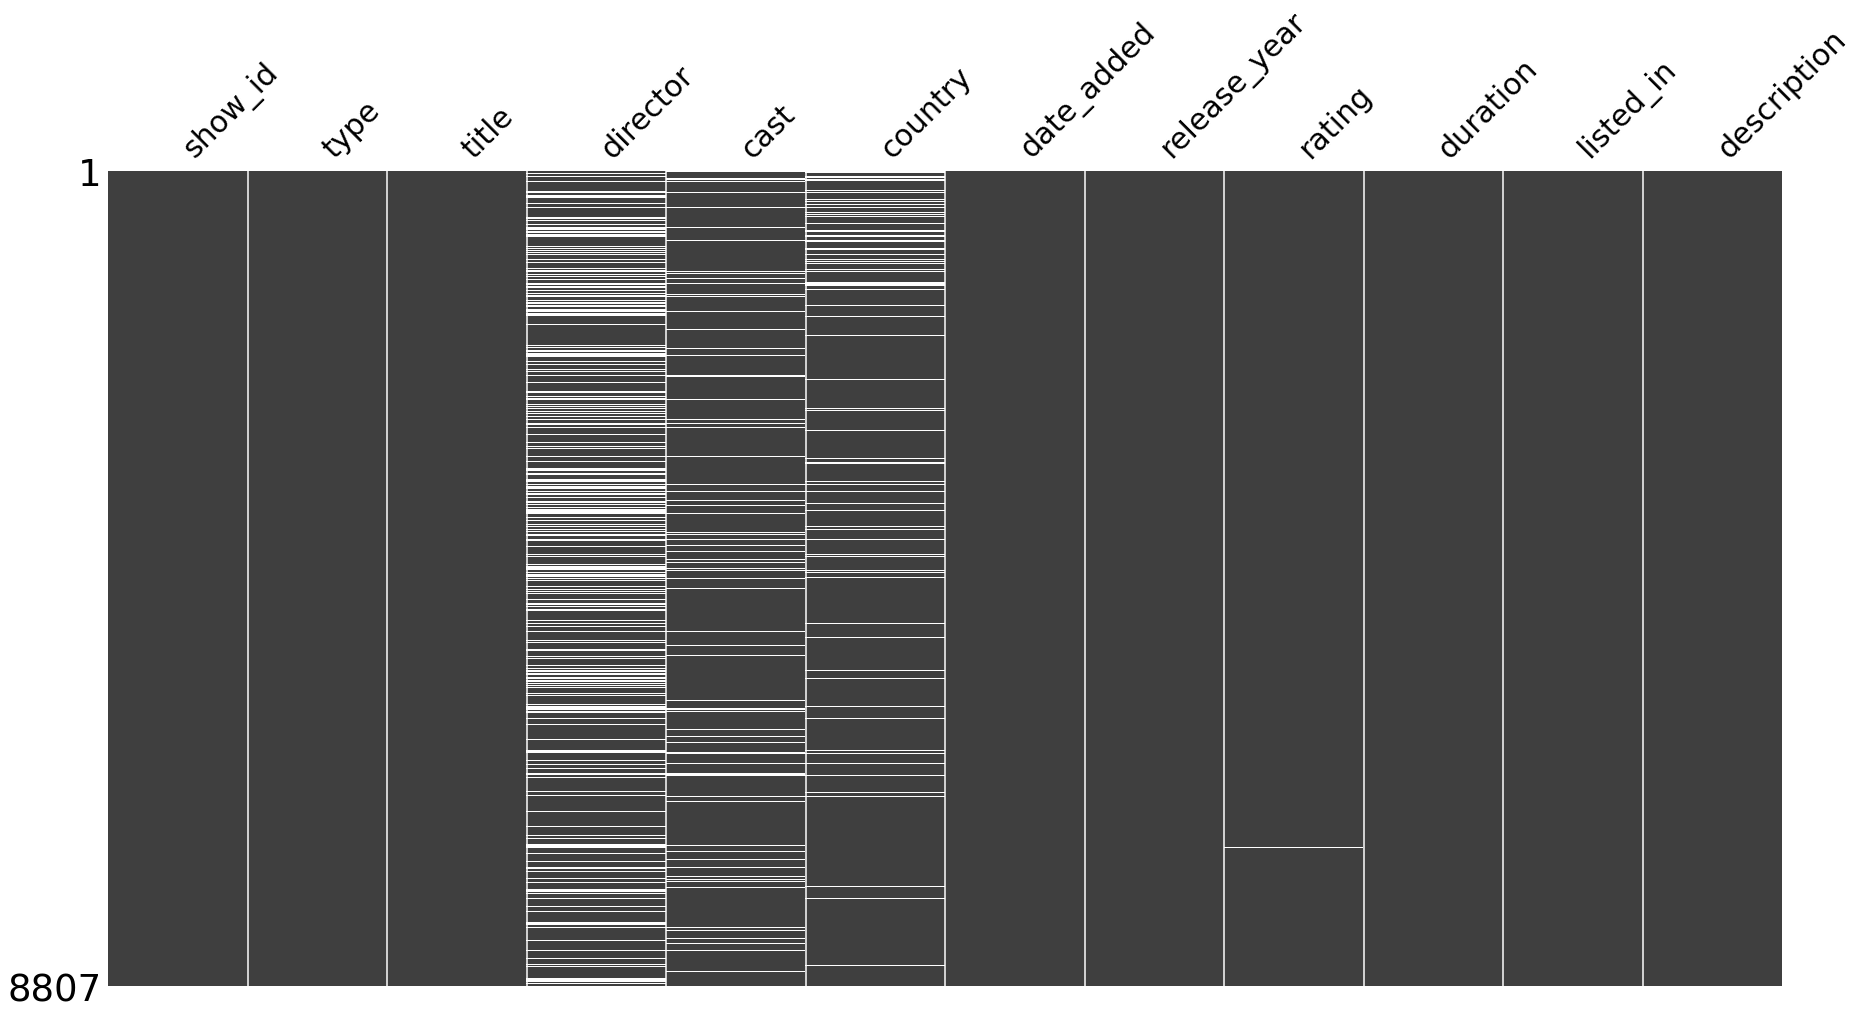

In [8]:
fig, ax = plt.subplots(figsize=(30,15))
msno.matrix(netflix, ax=ax, fontsize=30, sparkline=False)

Here, the white lines indicate the missing values in each column.

Text(0, 0.5, 'Count')

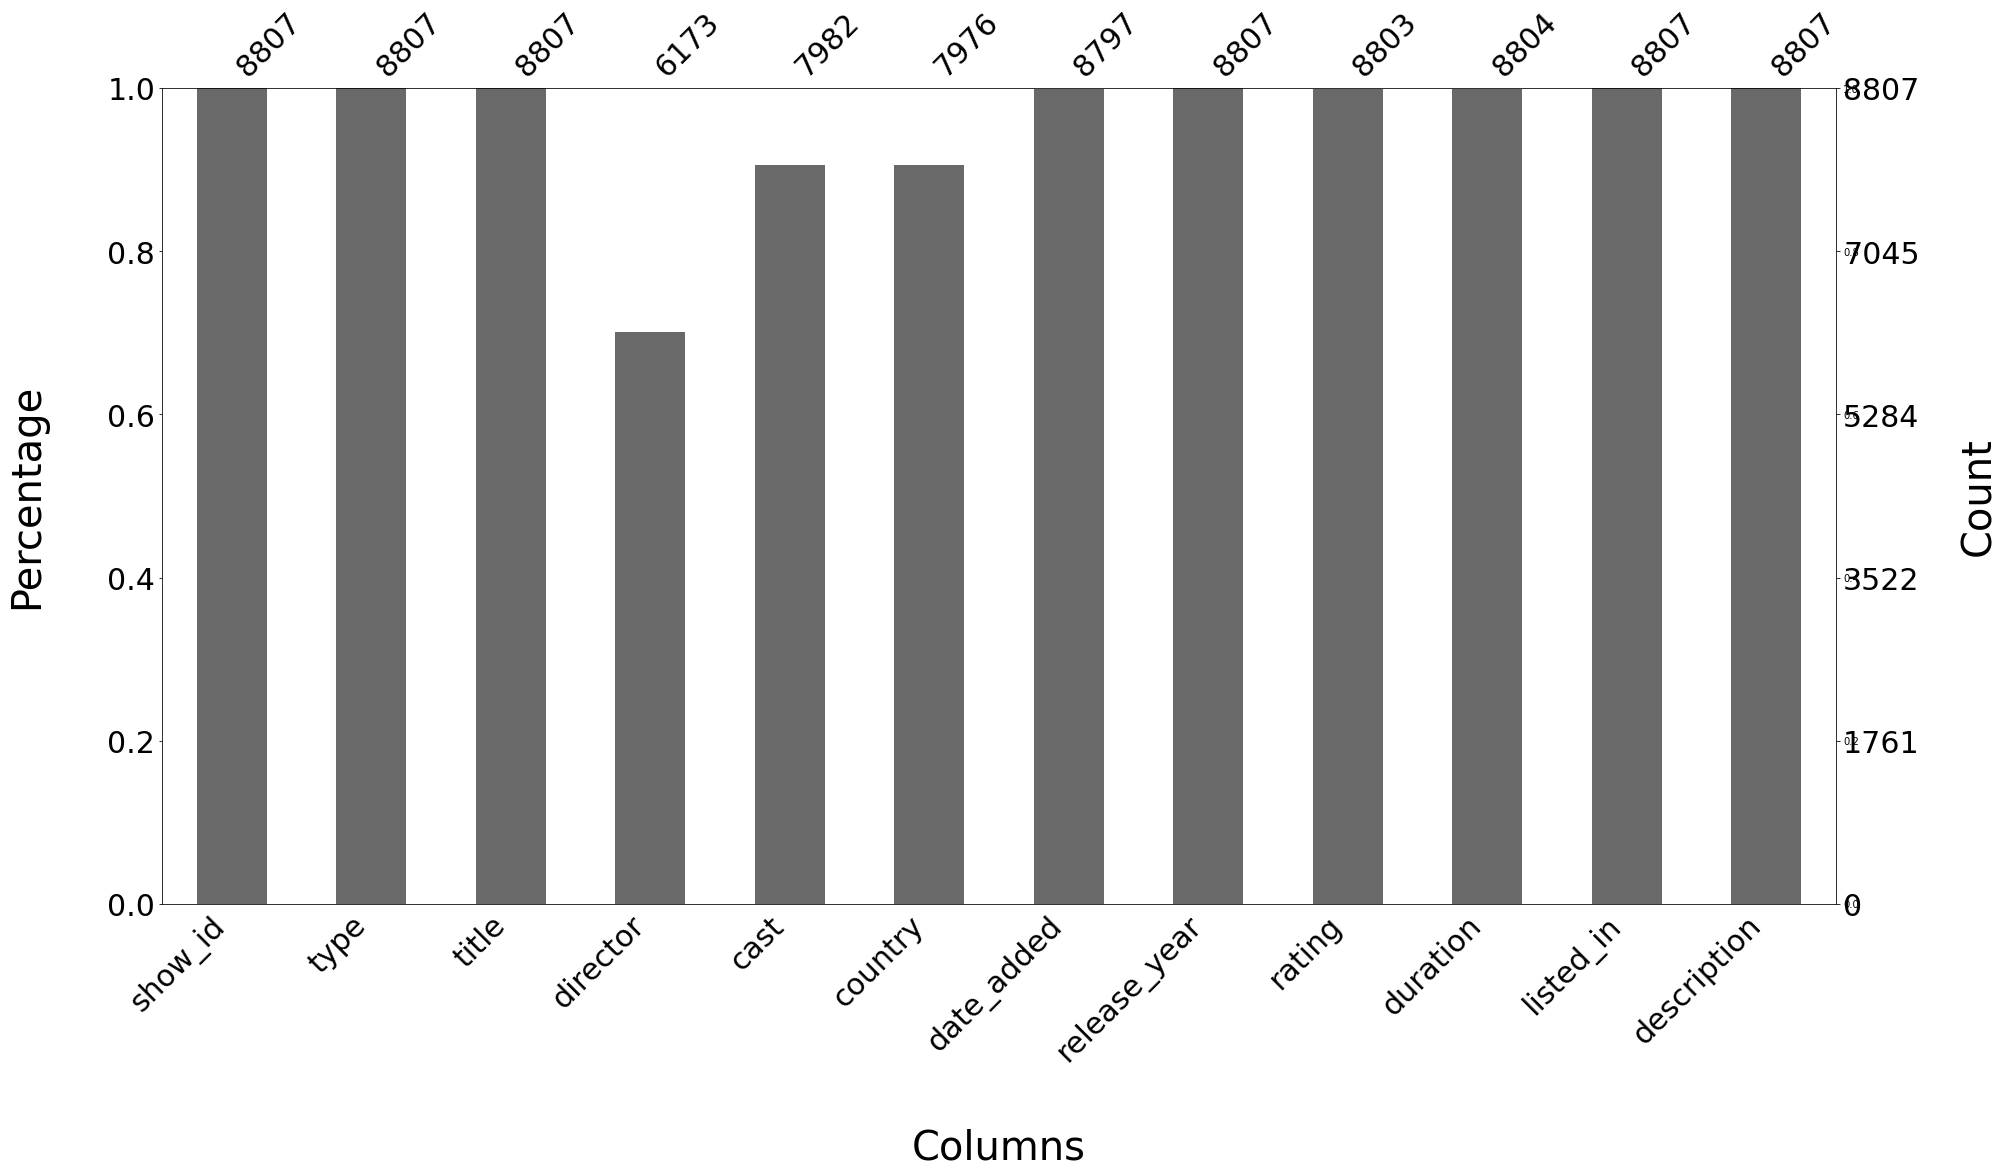

In [9]:
fig, ax = plt.subplots(figsize=(30,15))
msno.bar(netflix, ax=ax, fontsize=30)
ax.set_xlabel('Columns', fontsize=40,labelpad=60)
ax2 = ax.twinx()
ax.set_ylabel('Percentage', fontsize=40, labelpad=60)
ax2.set_ylabel('Count', fontsize=40, labelpad=100)

From the above bar graph, we can see that about 30% of data in <b>director</b> and 10% of data is missing in <b>cast and country</b> column.

## Dropping the columns having missing values less than 1% of the total dataset

In [10]:
netflix.isnull().sum()/len(netflix)

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

In [11]:
netflix.shape

(8807, 12)

In [12]:
drop_rating = netflix[netflix['rating'].isnull()].index
drop_rating

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [13]:
drop_duration = netflix[netflix['duration'].isnull()].index
drop_duration

Int64Index([5541, 5794, 5813], dtype='int64')

In [14]:
drop_date = netflix[netflix['date_added'].isnull()].index
drop_date

Int64Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [15]:
drop_index = drop_rating.append([drop_duration, drop_date])
drop_index

Int64Index([5989, 6827, 7312, 7537, 5541, 5794, 5813, 6066, 6174, 6795, 6806,
            6901, 7196, 7254, 7406, 7847, 8182],
           dtype='int64')

In [16]:
netflix.drop(drop_index,inplace=True)

In [17]:
netflix.shape

(8790, 12)

Text(0, 0.5, 'Count')

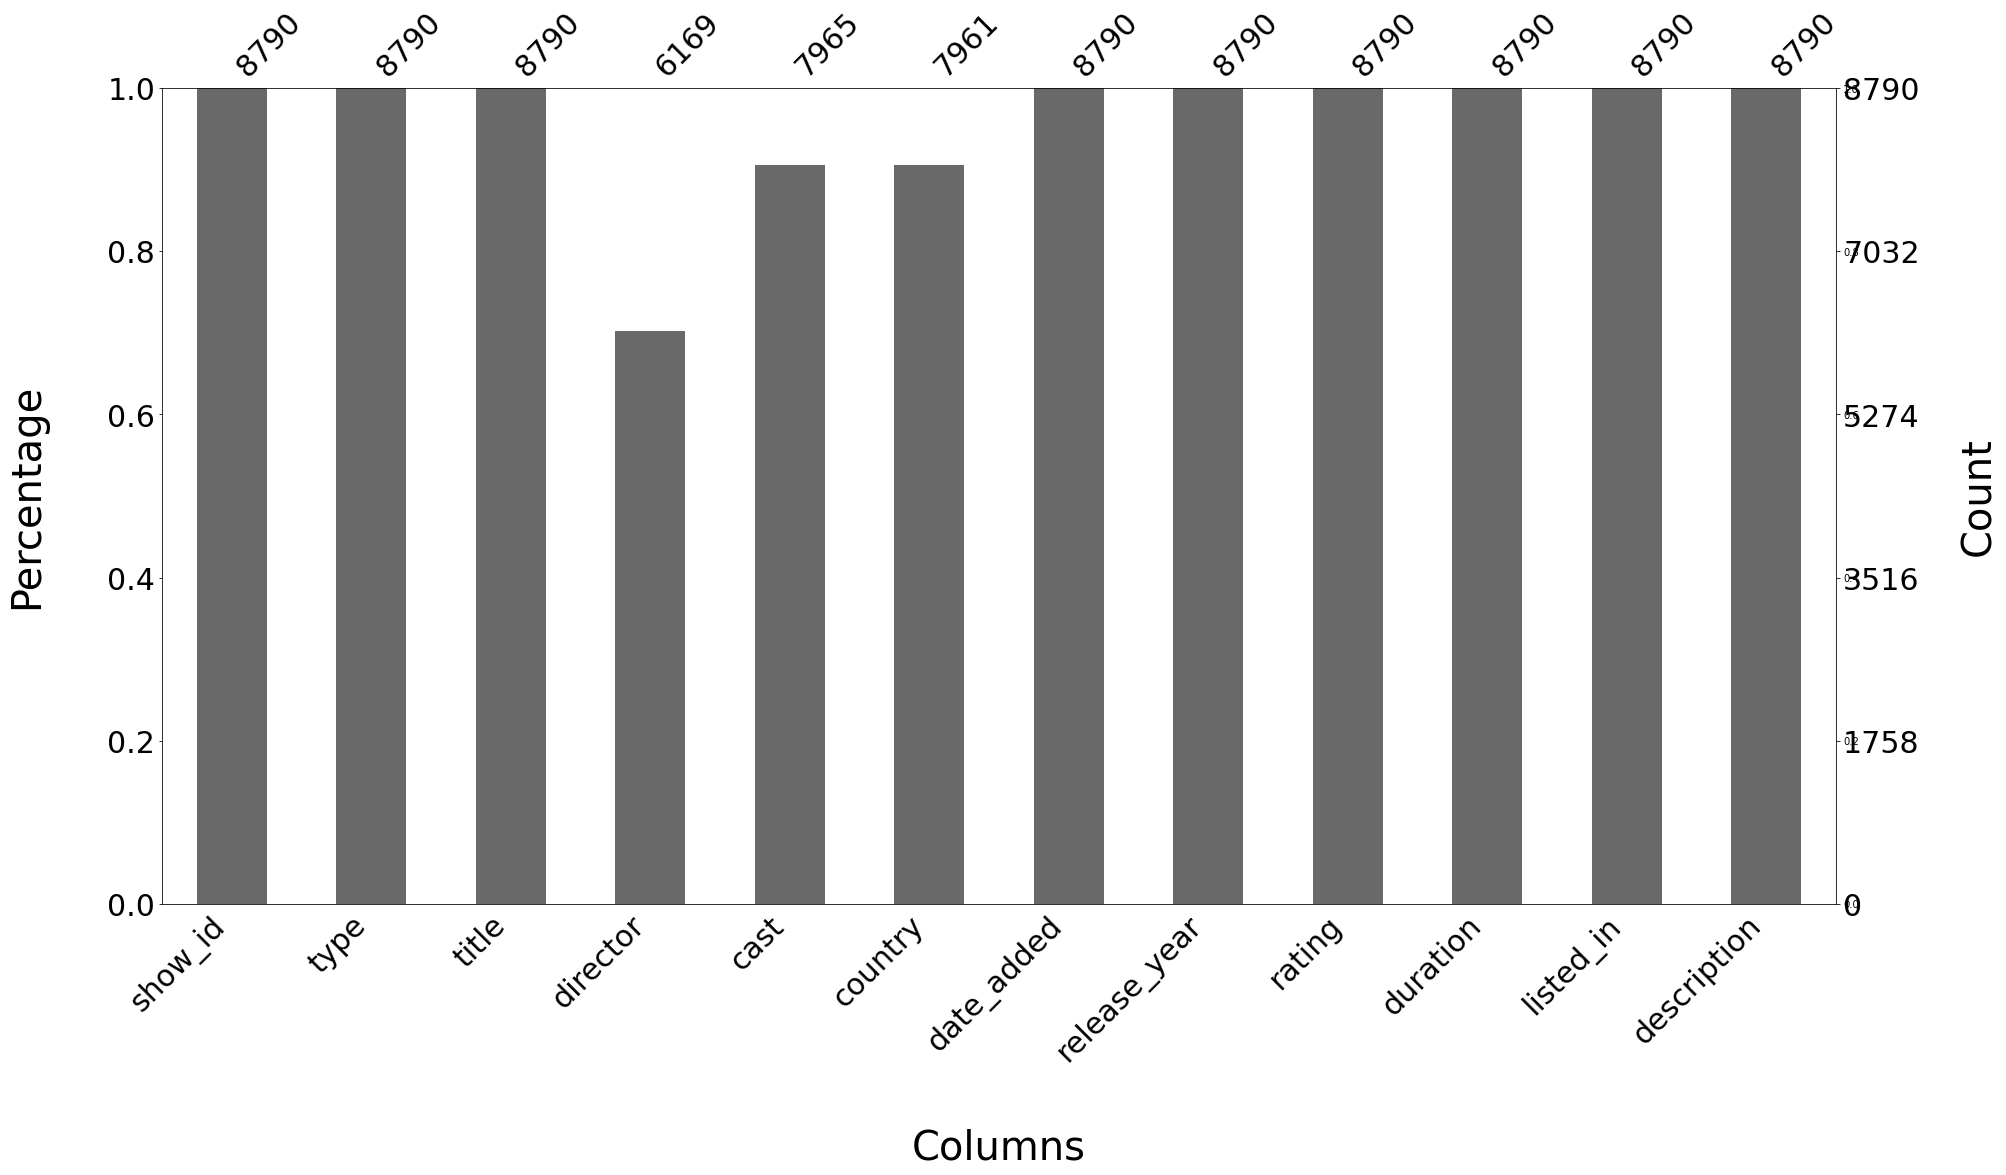

In [18]:
fig, ax = plt.subplots(figsize=(30,15))
msno.bar(netflix, ax=ax, fontsize=30)
ax.set_xlabel('Columns', fontsize=40,labelpad=60)
ax2 = ax.twinx()
ax.set_ylabel('Percentage', fontsize=40, labelpad=60)
ax2.set_ylabel('Count', fontsize=40, labelpad=100)

## Handling Missing Values

In [19]:
netflix.isnull().sum()/len(netflix)

show_id         0.000000
type            0.000000
title           0.000000
director        0.298180
cast            0.093857
country         0.094312
date_added      0.000000
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

## Handling the categorical missing values by replacing it with the most frequest occurence

In [62]:
most_frequent_country = netflix['country'].value_counts().index[0]
most_frequent_country

'United States'

In [63]:
netflix['country'].fillna(most_frequent_country,inplace=True)

In [68]:
most_frequent_cast = netflix['cast'].value_counts().index[0]
most_frequent_cast

'David Attenborough'

In [69]:
netflix['cast'].fillna(most_frequent_cast, inplace=True)

In [72]:
most_frequent_director = netflix['director'].value_counts().index[0]
most_frequent_director

'Rajiv Chilaka'

In [73]:
netflix['director'].fillna(most_frequent_director, inplace=True)

In [74]:
netflix.isnull().sum()/len(netflix)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [75]:
netflix.head(n=2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Converting Date Added to and a datetime object

In [116]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [117]:
netflix.head(n=2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Checking the total no of show type in Netflix

In [118]:
type_count=netflix['type'].value_counts().reset_index()
type_count = type_count.rename(columns={
    'type': 'count',
    'index': 'type'
})
type_count

,type,count
0,Movie,6126
1,TV Show,2664


In [119]:
import plotly.express as px

In [120]:
fig = px.pie(labels=type_count['type'], values=type_count['count'],height=400,title='Pie Chart Showing the distribution of Types of Shows on Netflix')
fig.show()

# Adding new features year_added and month_added from the existing date_added column

In [121]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [122]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [126]:
netflix['date_added'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: date_added, Length: 8790, dtype: int64

In [128]:
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

In [130]:
netflix.head(n=2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


# Content added over the years

In [213]:
movie_data = netflix[netflix['type']=='Movie']
tvshow_data = netflix[netflix['type']=='TV Show']

In [214]:
movie_year = movie_data['year_added'].value_counts().reset_index()
movie_year = movie_year.rename(columns={
    'index': 'year',
    'year_added': 'movie_count'
})
movie_year['percent'] = movie_year['movie_count'].apply(lambda x: 100*x/sum(movie_year['movie_count']))
movie_year.sort_values(by='year', inplace=True)
movie_year

,year,movie_count,percent
12,2008,1,0.016324
11,2009,2,0.032648
13,2010,1,0.016324
8,2011,13,0.212210
10,2012,3,0.048972
9,2013,6,0.097943
7,2014,19,0.310153
6,2015,56,0.914136
5,2016,251,4.097290
4,2017,836,13.646752


In [216]:
tvshow_year = tvshow_data['year_added'].value_counts().reset_index()
tvshow_year = tvshow_year.rename(columns={
    'index': 'year',
    'year_added': 'tv_show_count'
})
tvshow_year['percent'] = tvshow_year['tv_show_count'].apply(lambda x: 100*x/sum(tvshow_year['tv_show_count']))
tvshow_year.sort_values(by='year',inplace=True)
tvshow_year

,year,tv_show_count,percent
9,2008,1,0.037538
8,2013,5,0.187688
7,2014,5,0.187688
6,2015,26,0.975976
5,2016,175,6.569069
4,2017,349,13.100601
3,2018,411,15.427928
1,2019,592,22.222222
0,2020,595,22.334835
2,2021,505,18.956456


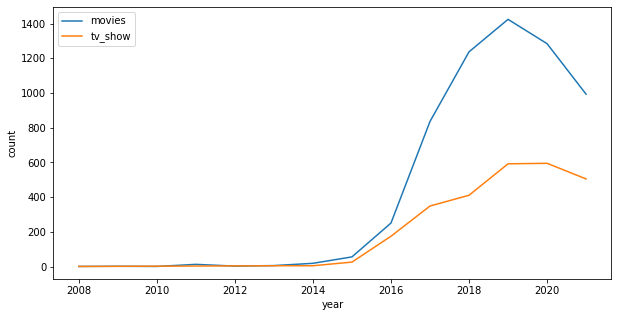

In [232]:
fig, ax= plt.subplots(figsize=(10,5))
sns.lineplot(x='year', y='movie_count',data=movie_year, ax=ax, label='movies')
sns.lineplot(x='year', y='tv_show_count',data=tvshow_year, ax=ax, label='tv_show')
plt.xlabel('year')
plt.ylabel('count')
plt.legend()
plt.show()

The plot above shows the growth in type of content added in the Netflix over the years.

Now, we will see a bargraph to see what type of content were released each_year

In [243]:
movie_bar = movie_data['release_year'].value_counts().reset_index()
movie_bar = movie_bar.rename(columns={
    'index': 'year', 
    'release_year': 'count'
})
movie_bar['percent'] = movie_bar['count'].apply(lambda x: 100 * x/sum(movie_bar['count']))
movie_bar.sort_values(by='year',inplace=True)
movie_bar

,year,count,percent
60,1942,2,0.032648
53,1943,3,0.048972
55,1944,3,0.048972
57,1945,3,0.048972
70,1946,1,0.016324
...,...,...,...
1,2017,765,12.487757
0,2018,767,12.520405
3,2019,633,10.333007
4,2020,517,8.439438


In [245]:
tv_bar = tvshow_data['release_year'].value_counts().reset_index()
tv_bar = tv_bar.rename(columns={
    'index': 'year', 
    'release_year': 'count'
})
tv_bar['percent'] = tv_bar['count'].apply(lambda x: 100 * x/sum(tv_bar['count']))
tv_bar.sort_values(by='year',inplace=True)
tv_bar

,year,count,percent
43,1925,1,0.037538
44,1945,1,0.037538
36,1946,1,0.037538
45,1963,1,0.037538
34,1967,1,0.037538
38,1972,1,0.037538
42,1974,1,0.037538
40,1977,1,0.037538
39,1979,1,0.037538
37,1981,1,0.037538


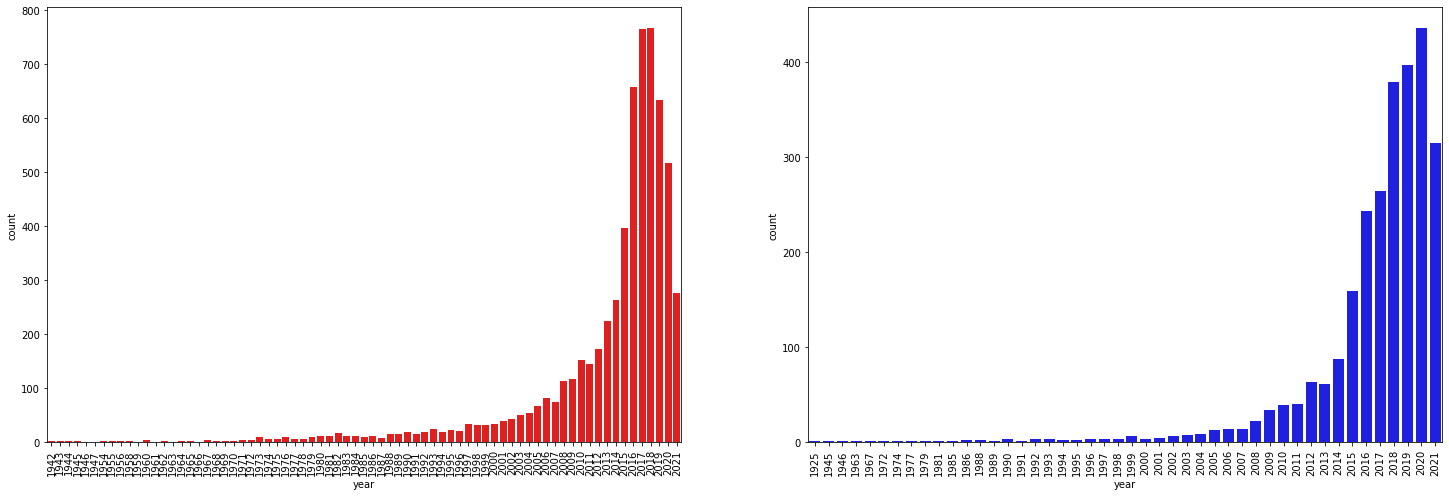

In [265]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
sns.barplot(x='year', y='count',data=movie_bar,ax=ax[0],color='red')
sns.barplot(x='year', y='count',data=tv_bar,ax=ax[1], color='blue')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

plt.show()